In [1]:
#import libraries
import math
import time
import sympy as sy
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve
from LinApp_FindSS import LinApp_FindSS
from sympy.utilities.lambdify import lambdify
import sys
import ar1_approx as ar1
%matplotlib inline

In [36]:
""" Problem 2 """

' Problem 2 '

In [81]:
#initialize paramters
alpha = .33
k = 5
z = 1
b = 2
t = .1    
h = 24

#create kgrid
kgrid = np.linspace(1,15,25)

In [82]:
#labor supply
def labor_supply(w, pi, k):
    return h - (b/(w*(1 + b)))*(w*h + pi - t)

def labor_demand(w, k):
    return ((1 - alpha)*z/w)**(1/alpha)*k

def profit(w, nd, k):
    return z*k**alpha*nd**(1 - alpha) - w * nd

def get_w(k1):
    if k1 < 5:
        state_init = 0.3
    else:
        state_init  = 0.8
    args = (alpha, k1, z, b, t, h)
    return opt.fsolve(errors, state_init, args = args)[0]

def errors(state, *args):
    alpha, k, z, b, t, h = args
    nd = labor_demand(state, k)
    pi = profit(state, nd ,k)
    ns = labor_supply(state, pi, k)
    error = nd - ns
    return error

def first_deriv(f, x, h = 1e-2):
    return (f(x + h)- f(x - h))/(2*h)
    
def second_deriv(f, x, h = 1e-2):
    return (f(x + h)+ f(x - h) - 2*f(x))/(h**2)

def first_approx(f, x0, x):
     return f(x0) + first_deriv(f, x0)*(x - x0) 
    
def second_approx(f, x0, x):
    return f(x0) + first_deriv(f, x0)*(x - x0) + 0.5* second_deriv(f,x0)*(x - x0) ** 2

In [83]:
state_init = 0.8
k = 5
args = (alpha, k, z, b, t, h)
w = opt.fsolve(errors, state_init, args = args)[0]
print("Equilibirum Wage at k =", k, ":", w)

Equilibirum Wage at k = 5 : 0.627361779044


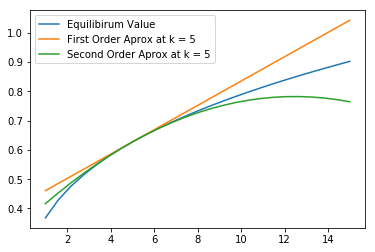

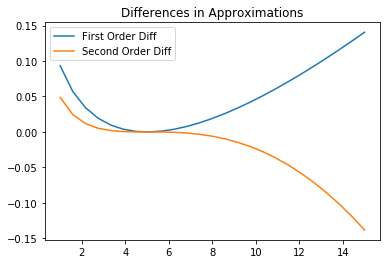

In [86]:
f  = lambda x: get_w(x)
weq = np.zeros_like(kgrid)
wfirst = np.zeros_like(kgrid)
wsecond = np.zeros_like(kgrid)

for i in range(len(kgrid)):
    weq[i] = get_w(kgrid[i])
    wfirst[i] = first_approx(f,5,kgrid[i])
    wsecond[i] = second_approx(f,5,kgrid[i])
    
plt.plot(kgrid, weq , label  = "Equilibirum Value")
plt.plot(kgrid, wfirst, label  = "First Order Aprox at k = 5")
plt.plot(kgrid, wsecond, label  = "Second Order Aprox at k = 5")
plt.legend()
plt.show()

diff1 = wfirst - weq
diff2 = wsecond - weq
plt.plot(kgrid, diff1, label  = "First Order Diff")
plt.plot(kgrid, diff2, label  = "Second Order Diff")
plt.title('Differences in Approximations')
plt.legend()
plt.show()

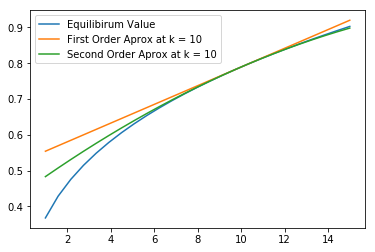

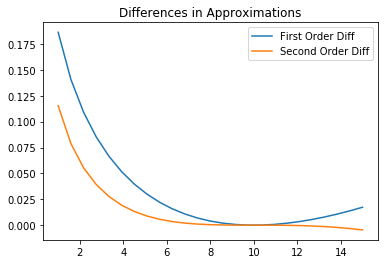

In [85]:
for i in range(len(kgrid)):
    weq[i] = get_w(kgrid[i])
    wfirst[i] = first_approx(f,10,kgrid[i])
    wsecond[i] = second_approx(f,10,kgrid[i])
    
plt.plot(kgrid, weq , label  = "Equilibirum Value")
plt.plot(kgrid, wfirst, label  = "First Order Aprox at k = 10")
plt.plot(kgrid, wsecond, label  = "Second Order Aprox at k = 10")
plt.legend()
plt.show()

diff1 = wfirst - weq
diff2 = wsecond - weq
plt.plot(kgrid, diff1, label  = "First Order Diff")
plt.plot(kgrid, diff2, label  = "Second Order Diff")
plt.title('Differences in Approximations')
plt.legend()
plt.show()

In [ ]:
""" Problem 3 """

In [28]:
def f(y, *args):
    x, = args
    error = (((x ** 0.35) + 0.9 * x - y) ** (-2.5)) -\
            (0.95 * ((y ** 0.35 + 0.9 * y) ** (-2.5)))
    return error

In [71]:
def first_deriv(f, x, h = 1e-2):
    return (f(x + h)- f(x - h))/(2*h)
    
def second_deriv(f, x, h = 1e-2):
    return (f(x + h)+ f(x - h) - 2*f(x))/(h**2)

def third_deriv(f, x, h = 1e-2):
    return (f(x + 2*h) - 2 * f(x + h) + 2 * f(x - h) - f(x - 2*h))/(2*(h**3))

def first_approx(f, x0, x):
     return f(x0) + first_deriv(f, x0)*(x - x0) 
    
def second_approx(f, x0, x):
    return f(x0) + first_deriv(f, x0)*(x - x0) + 0.5* second_deriv(f,x0)*(x - x0) ** 2

def third_approx(f, x0, x):
    return f(x0) + first_deriv(f, x0)*(x - x0) + 0.5* second_deriv(f,x0)*(x - x0) ** 2 + \
            1/6* third_deriv(f,x0)*(x - x0) ** 3

In [72]:
x0 = 100
y0 = 49.2166
x = np.linspace(99,101,20)
y = np.repeat(49.,20)

g = lambda x: opt.fsolve(f, y0, args = x)

#actual y
for i in range(len(x)):
    y[i] = g(x[i])
#first order approx
lin = first_approx(g, x0, x)
#second order approx
quad = second_approx(g, x0, x)
#third order approx
cube = third_approx(g, x0, x)

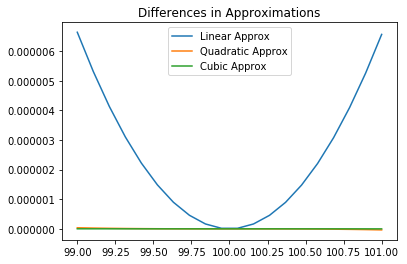

In [73]:
diff1 = lin - y
diff2 = quad - y
diff3 = cube - y
plt.plot(x, diff1, label='Linear Approx')
plt.plot(x, diff2, label='Quadratic Approx')
plt.plot(x, diff3, label='Cubic Approx')
plt.title('Differences in Approximations')
plt.legend()
plt.show()

In [74]:
""" Problem 4 """

' Problem 4 '

In [127]:
# Parameters
alpha = 0.35
beta = 0.98
rho = 0.95
sigma = 0.02

#kgrid
kbar = (alpha * beta)**(1/(1-alpha))
kgrid = np.linspace(0.5*kbar, 1.5*kbar, 25)
sizek = len(kgrid)

In [136]:
def getFy(k):
    return alpha*beta*(k**(alpha - 1))/(k**alpha - k)

def getFx(k):
    return -alpha*beta*(k**(alpha - 1))*(alpha + kbar**(alpha - 1))/(k**alpha - k)

def getFu(k):
    return alpha**2*beta*(k**(alpha - 1))**2/(k**alpha - k)

def getFyy(k):
    return 2*alpha*beta*(k**(alpha - 1))/(k**alpha - k)**2

def getFyu(k):
    return alpha**2*beta*(k**(alpha - 1)**2)/(k**alpha - k)**2
    
def getFyx(k):
    return alpha*beta*(k**alpha)*(k**(alpha - 1)*(1+ alpha - (alpha + 1)*k**(alpha - 1)))/(k**alpha - k)**3  
    
def getFxx(k):
    return alpha*beta*(k**alpha)*2*((k**(alpha - 1)**3) + (alpha**2 + 3*alpha - 4)*\
          (k**(alpha - 1)**2)- 2*(2*alpha - 1)*(k**(alpha-1)) - alpha**2 + alpha)/(k**alpha - k)**3
    
def getFxu(k):
    return -alpha**2*beta*(k**(alpha - 1)**2)*(k**(alpha - 1) + (alpha - 1))/(k**alpha - k)**2
    
def getFuu(k):
    return alpha**2*(alpha - 1)*beta*(k**(2*alpha - 3))/(k**alpha - k)

def get_derivatives(kbar):
    Fy = getFy(kbar)
    Fx = getFx(kbar)
    Fu = getFu(kbar)
    Fyy = getFyy(kbar)
    Fyu = getFyu(kbar)
    Fyx = getFyx(kbar)
    Fxx = getFxx(kbar)
    Fxu = getFxu(kbar)
    Fuu = getFuu(kbar)
    xu = -(Fx + np.sqrt(Fx**2 - 4*Fu*Fy))/(2*Fy)
    xuu = -(Fyy*(xu**4) + 2*Fyx*(xu**3) + 2*Fyu*(xu**2) + Fxx*(xu**2) +\
            2*Fxu*xu + Fuu)/(Fy*(xu**2) + Fy*xu + Fx)
    return xu, xuu

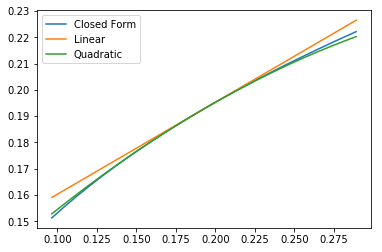

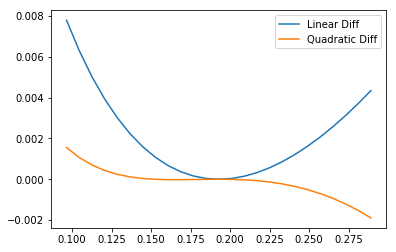

In [137]:
xu, xuu = get_derivatives(kbar)
closed = alpha*beta*(kgrid**alpha)
lin = kbar + xu*(kgrid - kbar)
quad = kbar + xu*(kgrid - kbar) + 0.5*xuu*(kgrid - kbar)**2
plt.plot(kgrid, closed, label = "Closed Form")
plt.plot(kgrid, lin, label = "Linear")
plt.plot(kgrid, quad, label = "Quadratic")
plt.legend()
plt.show()

diff1 = lin - closed
diff2 = quad - closed
plt.plot(kgrid, diff1, label = "Linear Diff")
plt.plot(kgrid, diff2, label = "Quadratic Diff")
plt.legend()
plt.show()